### CONNECTING TO GOOGLE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **IMPORTING NECESSARY LIBRARIES**




In [2]:
import os
import re
import time
import string
import locale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Locale settings
def getpreferredencoding(do_setlocale=True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# Package installations
!pip install openpyxl
!pip install --upgrade xlsxwriter
!pip install bertopic
!pip install flair
!apt-get -qq install -y libfluidsynth1

# NLP related imports
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

wn = nltk.WordNetLemmatizer()

# Machine learning and clustering imports
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from transformers.pipelines import pipeline
from hdbscan import hdbscan

# Topic modeling
from bertopic import BERTopic

# Embeddings
from flair.embeddings import (
    TransformerDocumentEmbeddings, 
    WordEmbeddings, 
    DocumentPoolEmbeddings, 
    StackedEmbeddings
)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/152.7 kB 5.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 61.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 98.5 MB/s eta 0:00:00
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## MERGING PRE-DOWNLOADED JOURNAL PAPERS

In [ ]:
# COMMENTED TO AVOID RUNNING BY MISTAKE
# #input directories being specified
# folder_path = r'/content/drive/MyDrive/TOPIC MODELLING/Papers'  

# #this functions combine nultiple excel files into a single one
# def combine_excel_files(folder_path):
#     dfs = []
#     for file_name in os.listdir(folder_path):
#         print("File name:", file_name)  # Debugging line
#         if file_name.endswith('.xls'):
#             file_path = os.path.join(folder_path, file_name)
#             df = pd.read_excel(file_path)
#             dfs.append(df)
#     combined_df = pd.concat(dfs, ignore_index=True)
#     return combined_df

# combined_df = combine_excel_files(folder_path)
# duplicates = combined_df[combined_df.duplicated()]
# unique_df = combined_df.drop_duplicates(subset=combined_df.columns[1:], keep='first')

# #output directory being specified
# output_file_path = r'/content/drive/MyDrive/TOPIC MODELLING/Joined/papers.xlsx'

# unique_df.to_excel(output_file_path, index=False, engine='openpyxl')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## READING THE EXCEL FILE INTO PANDAS DATAFRAME

In [3]:
path = r'/content/drive/MyDrive/TOPIC MODELLING/Joined/papers.xlsx'
dataset = pd.read_excel(path)
dataset

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,C,"Morsalin, S; Mahmud, K; Town, G",NaN,NaN,IEEE,"Morsalin, Sayidul; Mahmud, Khizir; Town, Graham",NaN,NaN,Electric Vehicle Charge Scheduling Using An Ar...,2016 IEEE INNOVATIVE SMART GRID TECHNOLOGIES -...,...,Conference Proceedings Citation Index - Scienc...,Computer Science; Engineering,BG7WJ,NaN,NaN,NaN,NaN,2023-04-25,WOS:000391851500047,0
1,C,"Zupancic, J; Lakic, E; Medved, T; Gubina, AF",NaN,NaN,IEEE,"Zupancic, Jernej; Lakic, Edin; Medved, Tomi; G...",NaN,NaN,Analysis of large scale storage impact on dist...,2018 15TH INTERNATIONAL CONFERENCE ON THE EURO...,...,Conference Proceedings Citation Index - Scienc...,Energy & Fuels; Engineering,BN4TC,NaN,NaN,NaN,NaN,2023-04-25,WOS:000482771100060,0
2,J,"Alsokhiry, F; Adam, GP",NaN,NaN,NaN,"Alsokhiry, Fahad; Adam, Grain Philip",NaN,NaN,Multi-Port DC-DC and DC-AC Converters for Larg...,SUSTAINABILITY,...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Environme...,OI2IN,NaN,"Green Published, gold",NaN,NaN,2023-04-25,WOS:000583109000001,0
3,J,"Lisin, E; Kurdiukova, G; Okley, P; Chernova, V",NaN,NaN,NaN,"Lisin, Evgeny; Kurdiukova, Galina; Okley, Pave...",NaN,NaN,Efficient Methods of Market Pricing in Power I...,ENERGIES,...,Science Citation Index Expanded (SCI-EXPANDED)...,Energy & Fuels,IZ1PM,NaN,"gold, Green Published",NaN,NaN,2023-04-25,WOS:000486860500047,0
4,J,"Rene, MQ; Mithulananthan, N; Li, JM; Lee, KY; ...",NaN,NaN,NaN,"Rene, Muhammad Qamar; Mithulananthan, Nadaraja...",NaN,NaN,An Ensemble Framework for Day-Ahead Forecast o...,IEEE TRANSACTIONS ON INDUSTRIAL INFORMATICS,...,Science Citation Index Expanded (SCI-EXPANDED),Automation & Control Systems; Computer Science...,IP9HM,NaN,Green Submitted,NaN,NaN,2023-04-25,WOS:000480360800022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30362,J,"Akram, MW; Ahmed, D; Trunina, A; Hamid, K; Haf...",NaN,NaN,NaN,"Akram, Muhammad Wasim; Ahmed, Danish; Trunina,...",NaN,NaN,How do financial fragility and ICT penetration...,ENVIRONMENTAL SCIENCE AND POLLUTION RESEARCH,...,Science Citation Index Expanded (SCI-EXPANDED),Environmental Sciences & Ecology,7L8XL,36586019.0,NaN,NaN,NaN,2023-04-24,WOS:000906242500005,0
30363,J,"Suresh, K; Jagatheeswari, P",NaN,NaN,NaN,"Suresh, K.; Jagatheeswari, P.",NaN,NaN,Economic analysis of a hybrid intelligent opti...,JOURNAL OF INTELLIGENT & FUZZY SYSTEMS,...,Science Citation Index Expanded (SCI-EXPANDED),Computer Science,4X8SS,NaN,NaN,NaN,NaN,2023-04-24,WOS:000861108300087,0
30364,C,"Musau, MP; Chepkania, TL; Odero, AN; Wekesa, CW",NaN,NaN,IEEE,"Musau, Moses Peter; Chepkania, Terry Lumbasi; ...",NaN,NaN,Effects of Renewable Energy on Frequency Stabi...,2017 IEEE PES POWERAFRICA CONFERENCE,...,Conference Proceedings Citation Index - Scienc...,Energy & Fuels; Engineering,BJ6GK,NaN,NaN,NaN,NaN,2023-04-24,WOS:000426661400003,0
30365,C,"Wu, J; Wang, H; Lai, XY; Yan, Y; Zhou, YZ; Wen...",NaN,"Rajakaruna, S; AbuSiada, A; Iu, HC; Ghosh, A; ...",NaN,"Wu, Jun; Wang, Hong; Lai, Xinyi; Yan, Yuan; Zh...",NaN,NaN,A Planning Method of Technical Standard Revisi...,PROCEEDINGS OF 2021 31ST AUSTRALASIAN UNIVERSI...,...,Conference Proceedings Citation Index - Scienc...,Energy & Fuels; Engineering,BT7FO,NaN,NaN,NaN,NaN,2023-04-24,WOS:000848257500069,0


## GETTING TO UNDERSTAND THE STUCTURE OF THE DATA

In [4]:
# Get the dataset information
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30367 entries, 0 to 30366
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Publication Type            30367 non-null  object 
 1   Authors                     30366 non-null  object 
 2   Book Authors                29 non-null     object 
 3   Book Editors                3126 non-null   object 
 4   Book Group Authors          8338 non-null   object 
 5   Author Full Names           30366 non-null  object 
 6   Book Author Full Names      30 non-null     object 
 7   Group Authors               6 non-null      object 
 8   Article Title               30367 non-null  object 
 9   Source Title                30367 non-null  object 
 10  Book Series Title           6813 non-null   object 
 11  Book Series Subtitle        2 non-null      object 
 12  Language                    30367 non-null  object 
 13  Document Type               303

### CHECKING FOR MISSING OBSERVATION IN EACH COLUMN

In [5]:
missing_values = dataset.isnull().sum()

# Convert to a list of tuples
missing_values_list = [(column, missing_count) for column, missing_count in missing_values.items()]

print("Number of missing values in each column:")
missing_values_list

Number of missing values in each column:


[('Publication Type', 0),
 ('Authors', 1),
 ('Book Authors', 30338),
 ('Book Editors', 27241),
 ('Book Group Authors', 22029),
 ('Author Full Names', 1),
 ('Book Author Full Names', 30337),
 ('Group Authors', 30361),
 ('Article Title', 0),
 ('Source Title', 0),
 ('Book Series Title', 23554),
 ('Book Series Subtitle', 30365),
 ('Language', 0),
 ('Document Type', 0),
 ('Conference Title', 18165),
 ('Conference Date', 18165),
 ('Conference Location', 18165),
 ('Conference Sponsor', 20514),
 ('Conference Host', 28503),
 ('Author Keywords', 1767),
 ('Keywords Plus', 10352),
 ('Abstract', 47),
 ('Addresses', 296),
 ('Affiliations', 2160),
 ('Reprint Addresses', 284),
 ('Email Addresses', 2170),
 ('Researcher Ids', 13920),
 ('ORCIDs', 10940),
 ('Funding Orgs', 15275),
 ('Funding Name Preferred', 15328),
 ('Funding Text', 15361),
 ('Cited References', 30367),
 ('Cited Reference Count', 0),
 ('Times Cited, WoS Core', 0),
 ('Times Cited, All Databases', 0),
 ('180 Day Usage Count', 0),
 ('Since 


## **DATA CLEANING** 

### DEALING WITH MISSING VALUES AND FLOAT OBJECTS







In [6]:
# Replace missing values with an empty string and transform floats value to string
dataset['Article Title'] = dataset['Article Title'].fillna('').apply(lambda x: str(x) if isinstance(x, float) else x)
dataset['Abstract'] = dataset['Abstract'].fillna('').apply(lambda x: str(x) if isinstance(x, float) else x)

### DROPPING ROWS WITH MISSING ABSTRACT

In [7]:
dataset = dataset.dropna(subset=['Abstract'])
# Reset the index
dataset.reset_index(drop=True, inplace=True)

### DROPPING DUPLICATES IN ARTICLE TITLE AND ABSTRACT COLUMNS

In [8]:
# Assuming your DataFrame is named 'dataset'
data = dataset.drop_duplicates(subset=['Article Title', 'Abstract'], keep='first')

# Reset the index
data.reset_index(drop=True, inplace=True)

## EXPLORATORY DATA ANALYSIS
 

### 1. Length distribution of Article Titles, Abstracts
Analyzing the distribution of lengths (number of characters or words) for each of these columns.
This can help identify any potential issues with very short or very long texts.

In [9]:
def get_text_statistics(data, column):
    word_counts = data[column].str.split().apply(len)
    avg_words = word_counts.mean()
    std_dev_words = word_counts.std()
    return avg_words, std_dev_words

avg_title_words, std_dev_title_words = get_text_statistics(data, 'Article Title')
avg_abstract_words, std_dev_abstract_words = get_text_statistics(data, 'Abstract')

print(f"Average number of words in 'Article Title': {avg_title_words:.2f}")
print(f"Standard deviation of words in 'Article Title': {std_dev_title_words:.2f}")

print(f"Average number of words in 'Abstract': {avg_abstract_words:.2f}")
print(f"Standard deviation of words in 'Abstract': {std_dev_abstract_words:.2f}")

Average number of words in 'Article Title': 12.53
Standard deviation of words in 'Article Title': 3.67
Average number of words in 'Abstract': 181.59
Standard deviation of words in 'Abstract': 60.29


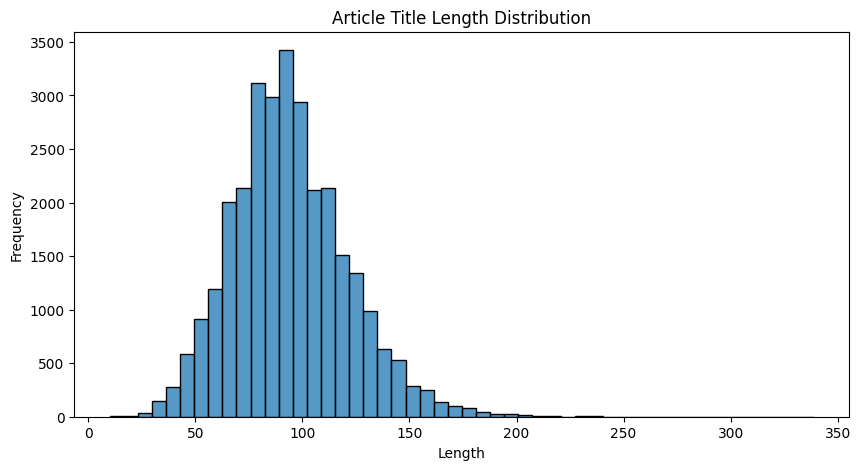

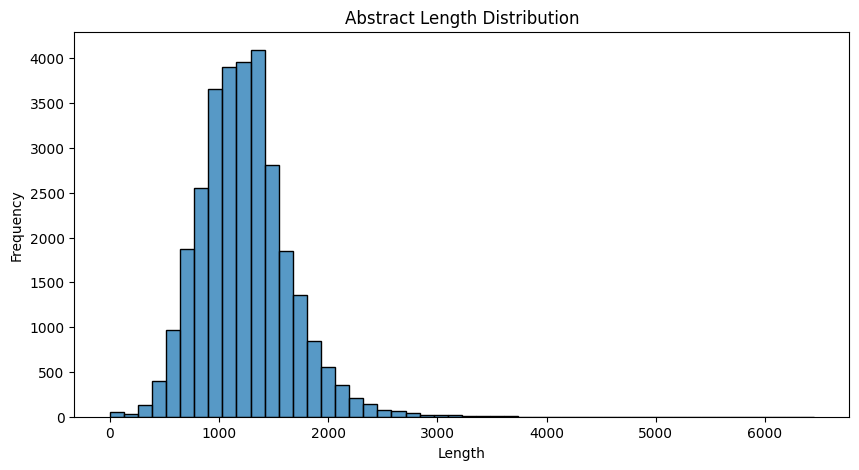

In [10]:
def plot_length_distribution(data, column, title):
    lengths = data[column].str.len()
    plt.figure(figsize=(10, 5))
    sns.histplot(lengths, kde=False, bins=50)
    plt.title(f'{title} Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()

plot_length_distribution(data, 'Article Title', 'Article Title')
plot_length_distribution(data, 'Abstract', 'Abstract')

### 2. Distribution of Publication Years

1991: 7
1992: 18
1993: 3
1994: 30
1995: 11
1996: 44
1997: 33
1998: 31
1999: 55
2000: 26
2001: 40
2002: 39
2003: 47
2004: 48
2005: 60
2006: 108
2007: 161
2008: 147
2009: 302
2010: 435
2011: 634
2012: 980
2013: 1168
2014: 1613
2015: 1725
2016: 2094
2017: 2389
2018: 2819
2019: 2921
2020: 3216
2021: 3800
2022: 3986
2023: 990


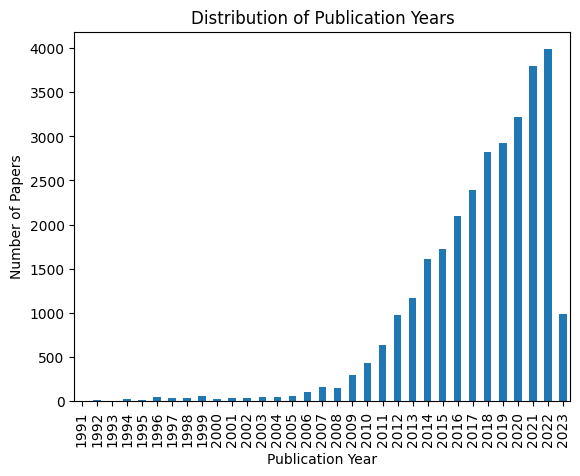

In [11]:
plt.figure()
year_counts = dataset['Publication Year'].value_counts().sort_index()
for year, count in year_counts.items():
  print(f"{int(year)}: {count}")


ax = year_counts.plot(kind='bar')
plt.xlabel('Publication Year')
plt.ylabel('Number of Papers')
plt.title('Distribution of Publication Years')

# Format x-axis tick labels as integers
ax.set_xticklabels([int(float(label.get_text())) for label in ax.get_xticklabels()])

plt.show()

### 3. Visualizing the paper types




Article                       15443
Proceedings Paper             11594
Review                         2207
Article; Proceedings Paper      603
Article; Early Access           346
Editorial Material               83
Name: Document Type, dtype: int64


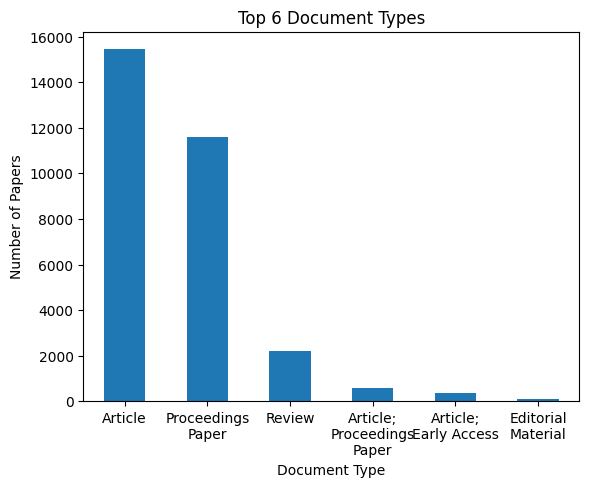

In [13]:
import textwrap
# Plot the bar chart for document types
plt.figure()
document_type_counts = dataset['Document Type'].value_counts().head(6)
print(document_type_counts)  # Display the top 5 document types

ax = document_type_counts.plot(kind='bar')
plt.xlabel('Document Type')
plt.ylabel('Number of Papers')
plt.title('Top 6 Document Types')

# Wrap x-axis tick labels and rotate them horizontally
wrapped_labels = [textwrap.fill(label.get_text(), width=12) for label in ax.get_xticklabels()]
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')

plt.show()

### 4. Checking the top 10 sources of the papers





ENERGIES                                  1312
RENEWABLE & SUSTAINABLE ENERGY REVIEWS    1101
RENEWABLE ENERGY                           934
ENERGY                                     693
APPLIED ENERGY                             643
ENERGY POLICY                              635
IEEE TRANSACTIONS ON SMART GRID            614
IEEE ACCESS                                556
SUSTAINABILITY                             458
JOURNAL OF CLEANER PRODUCTION              263
Name: Source Title, dtype: int64


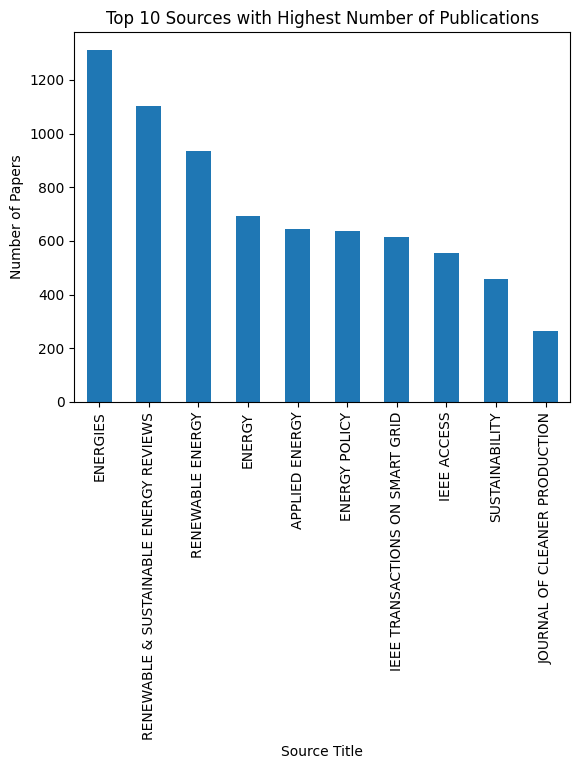

In [14]:

# Plot the bar chart for source titles
plt.figure()
source_title_counts = dataset['Source Title'].value_counts().head(10)
print(source_title_counts)  # Display the top 10 sources

source_title_counts.plot(kind='bar')
plt.xlabel('Source Title')
plt.ylabel('Number of Papers')
plt.title('Top 10 Sources with Highest Number of Publications')

plt.show()

#### 5. Statistical Analysis of numerical columns


In [16]:
quantitative_columns = ['Cited Reference Count', 'Times Cited, WoS Core', '180 Day Usage Count', 'Since 2013 Usage Count']
summary_statistics = data[quantitative_columns].describe()
summary_statistics

,Cited Reference Count,"Times Cited, WoS Core",180 Day Usage Count,Since 2013 Usage Count
count,30022.000000,30022.000000,30022.000000,30022.000000
mean,39.302611,21.818067,3.610852,21.107754
std,42.075533,63.006606,10.179886,53.950361
min,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,2.000000
50%,29.000000,4.000000,1.000000,7.000000
75%,48.000000,18.000000,4.000000,22.000000
max,2132.000000,2970.000000,497.000000,2747.000000


### 6. Top 20 Cited Papers

In [15]:
top_cited_papers = data.nlargest(20, 'Times Cited, All Databases')[['Article Title', 'Authors', 'Times Cited, All Databases']]
print("Top 20 most cited papers:")
top_cited_papers

Top 20 most cited papers:


,Article Title,Authors,"Times Cited, All Databases"
16589,A lithium superionic conductor,"Kamaya, N; Homma, K; Yamakawa, Y; Hirayama, M;...",3089
20762,Role of renewable energy sources in environmen...,"Panwar, NL; Kaushik, SC; Kothari, S",1930
14922,The Impact of Charging Plug-In Hybrid Electric...,"Clement-Nyns, K; Haesen, E; Driesen, J",1825
15674,"Review of Battery Charger Topologies, Charging...","Yilmaz, M; Krein, PT",1667
13293,Efficient Processing of Deep Neural Networks: ...,"Sze, V; Chen, YH; Yang, TJ; Emer, JS",1663
2421,Demand response and smart grids-A survey,"Siano, P",1397
23873,"Renewable energy resources: Current status, fu...","Ellabban, O; Abu-Rub, H; Blaabjerg, F",1392
22351,The role of renewable energy in the global ene...,"Gielen, D; Boshell, F; Saygin, D; Bazilian, MD...",1336
29621,Renewable energy and sustainable development: ...,"Dincer, I",1262
24292,A realizable renewable energy future,"Turner, JA",1249


Average citation counts by year:
1991: 17
1992: 15
1993: 17
1994: 5
1995: 17
1996: 6
1997: 19
1998: 25
1999: 47
2000: 92
2001: 76
2002: 51
2003: 64
2004: 51
2005: 88
2006: 49
2007: 51
2008: 59
2009: 48
2010: 52
2011: 60
2012: 36
2013: 36
2014: 34
2015: 29
2016: 32
2017: 27
2018: 24
2019: 22
2020: 18
2021: 11
2022: 4
2023: 1


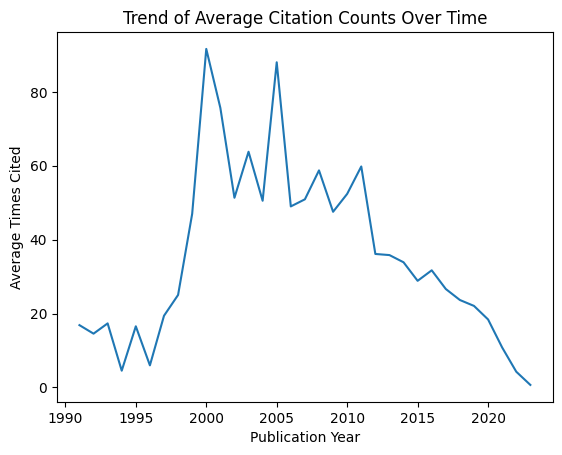

In [17]:
# Group the dataset by 'Publication Year' and calculate the mean of 'Times Cited, All Databases'
citation_trend = dataset.groupby('Publication Year')['Times Cited, All Databases'].mean()

# Print the average citation counts for each year
print("Average citation counts by year:")
for year, counts in citation_trend.items():
  print(f"{int(year)}: {round(counts)}")

# Plot the trend of average citation counts over time
plt.figure()
citation_trend.plot(kind='line')
plt.xlabel('Publication Year')
plt.ylabel('Average Times Cited')
plt.title('Trend of Average Citation Counts Over Time')
plt.show()

## DATA PREPROCESSING

### Dropping Columns not needed

In [18]:
columns_of_interest = ['Article Title', 'Abstract']
data = data[columns_of_interest]
data

,Article Title,Abstract
0,Electric Vehicle Charge Scheduling Using An Ar...,With the integration of EVs into the power gri...
1,Analysis of large scale storage impact on dist...,The installation of new smart grid technologie...
2,Multi-Port DC-DC and DC-AC Converters for Larg...,Numerous research studies on high capacity DC-...
3,Efficient Methods of Market Pricing in Power I...,"Currently, the majority of world economies (ev..."
4,An Ensemble Framework for Day-Ahead Forecast o...,The uncertainty associated with solar photovol...
...,...,...
30017,How do financial fragility and ICT penetration...,Green growth is an extension of traditional ec...
30018,Economic analysis of a hybrid intelligent opti...,Renewable energy has seen a substantial increa...
30019,Effects of Renewable Energy on Frequency Stabi...,Renewable Energy (RE) units especially grid co...
30020,A Planning Method of Technical Standard Revisi...,Perfecting technical standards for renewable e...


### Joining Title and Abstract

In [19]:
data = data[['Article Title', 'Abstract']].copy()
data['Title + Abstract'] = data['Article Title'] + ' ' + data['Abstract']

### Stop words and punctuation removal, Lemmatization, Lower Case Conversion



In [20]:
def clean_text_update(text):
    def remove_punctuation(text):
        return text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = remove_punctuation(text)

    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    custom_stopwords = ['elsevier', 'ltd', 'right', 'reserved', 'from', 'subject', 're', 'edu', 'use']  # custom stopwords
    stopwords.extend(custom_stopwords)  # extend the list with custom stopwords

    words = [w for w in text.split() if w.lower() not in stopwords]
    text = ' '.join(words)

    # Lemmatization
    wn = WordNetLemmatizer()
    lemmatized_words = [wn.lemmatize(w) for w in words]
    text = ' '.join(lemmatized_words)

    return text

# Apply the clean_text function to the 'Title + Abstract' column
data['Cleaned_Title + Abstract'] = data['Title + Abstract'].apply(clean_text_update)

## MORE EDA 


### 6. Word cloud visualization
Creating word clouds for the 'Title_Abstract_lemmatized' column to get a visual representation of the most frequent words in the dataset.

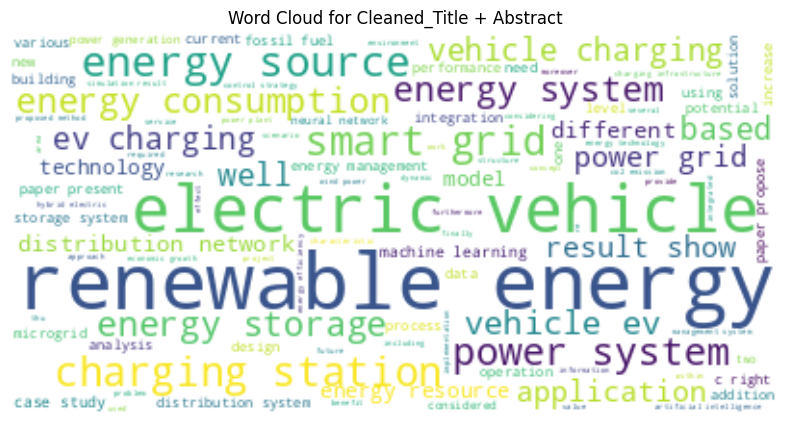

In [21]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

all_text = ' '.join(data['Cleaned_Title + Abstract'])
plot_wordcloud(all_text, 'Word Cloud for Cleaned_Title + Abstract')

### Function to Print and Display BiGrams and TriGrams

In [22]:
from nltk import bigrams, trigrams
# Convert the cleaned text to a list of words
data['Cleaned_Words'] = data['Cleaned_Title + Abstract'].apply(lambda x: x.split())

# Create bigrams
data['Bigrams'] = data['Cleaned_Words'].apply(lambda x: list(bigrams(x)))

# Create trigrams
data['Trigrams'] = data['Cleaned_Words'].apply(lambda x: list(trigrams(x)))

# Flatten the list of bigrams and count the frequency of each bigram
bigrams_list = [bigram for sublist in data['Bigrams'].tolist() for bigram in sublist]
bigram_counts = Counter(bigrams_list)

# Flatten the list of trigrams and count the frequency of each trigram
trigrams_list = [trigram for sublist in data['Trigrams'].tolist() for trigram in sublist]
trigram_counts = Counter(trigrams_list)

def plot_ngrams(ngrams, ngram_counts, title):
    plt.figure(figsize=(10, 5))
    colors = plt.cm.viridis(np.linspace(0, 1, 10))  # generate 10 different colors
    plt.barh(range(len(ngrams)), ngram_counts, color=colors)
    plt.yticks(range(len(ngrams)), [' '.join(ngram) for ngram in ngrams])
    plt.xlabel('Frequency')
    plt.ylabel(title)
    plt.title(f'Top 10 Most Frequent {title}')
    plt.gca().invert_yaxis()  # invert the y-axis to have the most frequent ngram at the top
    plt.show()

### 7. Top frequent words (Unigram Analysis)
Finding the most frequent words in the 'Title + Abstract_lemmatized' column and visualizing them using a bar plot.

energy: 101,014
system: 54,878
renewable: 49,728
power: 44,199
charging: 41,988
vehicle: 36,446
electric: 33,921
grid: 26,942
model: 24,714
ev: 23,406


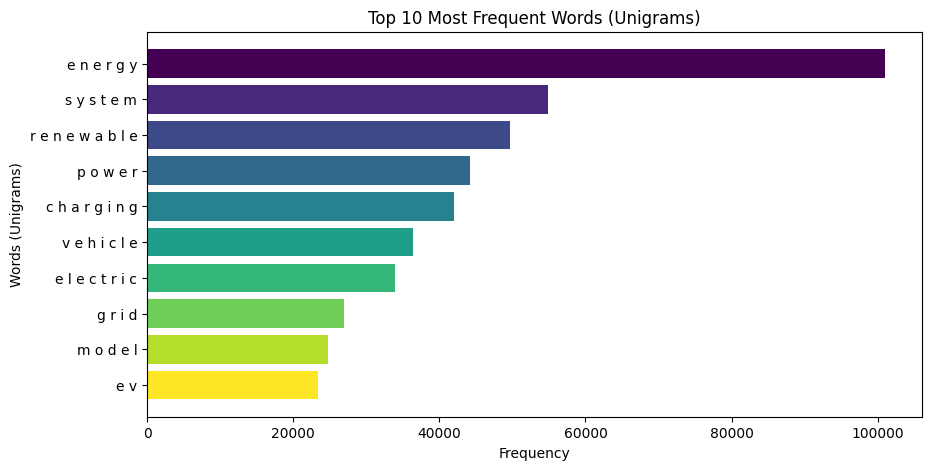

In [23]:
from nltk import FreqDist

# Flatten the list of words and create a frequency distribution
words_list = [word for sublist in data['Cleaned_Words'].tolist() for word in sublist]
word_counts = FreqDist(words_list)

# List out and plot the top 10 most common words
words, word_counts = zip(*word_counts.most_common(10))
for word, count in zip(words, word_counts):
    print(f'{word}: {count:,}')
plot_ngrams(words, word_counts, title='Words (Unigrams)')


### List and Display Bigrams

renewable energy: 41,234
electric vehicle: 27,034
energy source: 8,805
smart grid: 8,274
charging station: 7,955
power system: 6,961
energy system: 5,769
energy storage: 5,712
energy consumption: 5,583
vehicle ev: 4,894


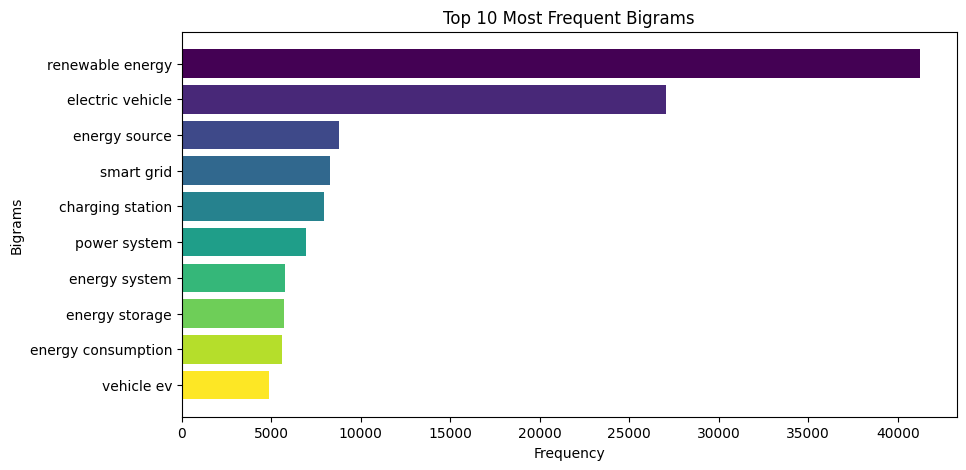

In [24]:
# List out and plot the top 10 most common bigrams
bigrams, bigram_counts = zip(*bigram_counts.most_common(10))
for bigram, count in zip(bigrams, bigram_counts):
    print(f'{bigram[0]} {bigram[1]}: {count:,}')
plot_ngrams(bigrams, bigram_counts, title='Bigrams')



### List and Display Trigrams

renewable energy source: 6,850
electric vehicle ev: 4,746
electric vehicle charging: 4,103
renewable energy system: 2,409
energy storage system: 2,095
renewable energy consumption: 1,971
renewable energy resource: 1,771
hybrid electric vehicle: 1,708
renewable energy technology: 1,503
plugin electric vehicle: 1,483


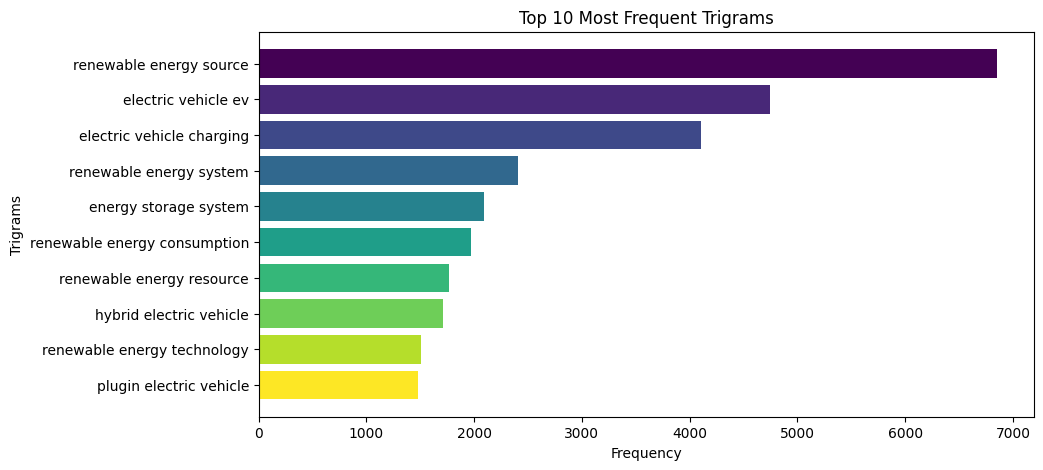

In [25]:
# In a new cell, list out and plot the top 10 most common trigrams
trigrams, trigram_counts = zip(*trigram_counts.most_common(10))
for trigram, count in zip(trigrams, trigram_counts):
    print(f'{trigram[0]} {trigram[1]} {trigram[2]}: {count:,}')
plot_ngrams(trigrams, trigram_counts, title='Trigrams')




# 1. TOPIC MODELLING USING BERTOPIC:

### BERTopic Model Initialization and Configuration


In [26]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Clustering model
kmeans_model = KMeans(n_clusters=8)
# Initiate a sentence transformer model
sentence_model = SentenceTransformer("paraphrase-albert-small-v2")
# Initiate a pretrained model
hf_model = pipeline("feature-extraction", model="distilroberta-base")

# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')
# Initiate another pretrained embedding model
glove_embedding = WordEmbeddings('crawl')
document_glove_embeddings = DocumentPoolEmbeddings([glove_embedding])
# Stack the two pretrained embedding models
stacked_embeddings = StackedEmbeddings(embeddings=[roberta_model, 
document_glove_embeddings])

# Count vectorizer
vectorizer_model = CountVectorizer(min_df=10)

# Initiate BERTopic
topic_model8 = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model, n_gram_range=(1, 3))


Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


2023-05-01 20:22:26,061 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmp_wnjgwhq


100%|██████████| 1.12G/1.12G [00:53<00:00, 22.6MB/s]

2023-05-01 20:23:19,616 copying /tmp/tmp_wnjgwhq to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M.vectors.npy


2023-05-01 20:23:24,313 removing temp file /tmp/tmp_wnjgwhq
2023-05-01 20:23:25,164 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M not found in cache, downloading to /tmp/tmpnn3ah995


100%|██████████| 37.5M/37.5M [00:02<00:00, 15.1MB/s]

2023-05-01 20:23:28,174 copying /tmp/tmpnn3ah995 to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M


2023-05-01 20:23:28,272 removing temp file /tmp/tmpnn3ah995


### RUNNING THE BERTopic MODEL

In [27]:
import time
# Start the timer
start_time_bert_8 = time.time()

# Run BERTopic model
topics, probabilities = topic_model8.fit_transform(data['Cleaned_Title + Abstract'])

# Stop the timer
end_time_bert8 = time.time()

In [30]:
time_taken_bert8 = end_time_bert8 - start_time_bert_8
# Print the time taken
print(f"Time taken to train the topic modeling model: {time_taken_bert8} seconds")

Time taken to train the topic modeling model: 2221.0222499370575 seconds


In [31]:
# Get the list of topics
topic_model8.get_topic_info()

,Topic,Count,Name
0,0,7713,0_charging_vehicle_electric_ev
1,1,5197,1_power_system_energy_grid
2,2,5104,2_energy_renewable_renewable energy_policy
3,3,3601,3_energy_renewable_renewable energy_system
4,4,3010,4_learning_model_machine_data
5,5,2676,5_smart_grid_system_data
6,6,2034,6_battery_vehicle_electric_electric vehicle
7,7,687,7_wireless_charging_vehicle_transfer


In [33]:
num_topics = len(topic_model8.get_topic_info())

for i in range(num_topics):
    print(f"Topic {i}:")
    terms = topic_model8.get_topic(i)
    for term, weight in terms:
        print(f"  {term}: {weight:.4f}")
    print()

Topic 0:
  charging: 0.0438
  vehicle: 0.0336
  electric: 0.0304
  ev: 0.0289
  electric vehicle: 0.0276
  station: 0.0153
  charging station: 0.0132
  power: 0.0129
  system: 0.0123
  model: 0.0109

Topic 1:
  power: 0.0265
  system: 0.0264
  energy: 0.0255
  grid: 0.0202
  renewable: 0.0146
  control: 0.0141
  smart: 0.0125
  renewable energy: 0.0118
  integration: 0.0116
  distribution: 0.0113

Topic 2:
  energy: 0.0536
  renewable: 0.0443
  renewable energy: 0.0410
  policy: 0.0152
  development: 0.0150
  country: 0.0149
  economic: 0.0109
  source: 0.0105
  consumption: 0.0104
  study: 0.0101

Topic 3:
  energy: 0.0446
  renewable: 0.0287
  renewable energy: 0.0239
  system: 0.0238
  power: 0.0131
  storage: 0.0120
  source: 0.0113
  energy system: 0.0111
  cost: 0.0107
  electricity: 0.0103

Topic 4:
  learning: 0.0211
  model: 0.0175
  machine: 0.0160
  data: 0.0150
  system: 0.0138
  machine learning: 0.0129
  method: 0.0113
  energy: 0.0112
  artificial: 0.0108
  network: 0.00

In [34]:
# Visualize top topic keywords
topic_model8.visualize_barchart(top_n_topics=8)

In [35]:
# Visualize term rank decrease
topic_model8.visualize_term_rank()

In [36]:
# Visualize intertopic distance
topic_model8.visualize_topics()

In [37]:
# Visualize connections between topics using hierachical clustering
topic_model8.visualize_hierarchy(top_n_topics=10)

In [38]:
# Visualize similarity using heatmap
topic_model8.visualize_heatmap()

In [39]:
# Get the topic predictions
topic_prediction = topic_model8.topics_[:]
# Save the predictions in the dataframe
data['topic_prediction'] = topic_prediction
# Take a look at the data
data

,Article Title,Abstract,Title + Abstract,Cleaned_Title + Abstract,Cleaned_Words,Bigrams,Trigrams,topic_prediction
0,Electric Vehicle Charge Scheduling Using An Ar...,With the integration of EVs into the power gri...,Electric Vehicle Charge Scheduling Using An Ar...,electric vehicle charge scheduling using artif...,"[electric, vehicle, charge, scheduling, using,...","[(electric, vehicle), (vehicle, charge), (char...","[(electric, vehicle, charge), (vehicle, charge...",0
1,Analysis of large scale storage impact on dist...,The installation of new smart grid technologie...,Analysis of large scale storage impact on dist...,analysis large scale storage impact distributi...,"[analysis, large, scale, storage, impact, dist...","[(analysis, large), (large, scale), (scale, st...","[(analysis, large, scale), (large, scale, stor...",1
2,Multi-Port DC-DC and DC-AC Converters for Larg...,Numerous research studies on high capacity DC-...,Multi-Port DC-DC and DC-AC Converters for Larg...,multiport dcdc dcac converter largescale integ...,"[multiport, dcdc, dcac, converter, largescale,...","[(multiport, dcdc), (dcdc, dcac), (dcac, conve...","[(multiport, dcdc, dcac), (dcdc, dcac, convert...",1
3,Efficient Methods of Market Pricing in Power I...,"Currently, the majority of world economies (ev...",Efficient Methods of Market Pricing in Power I...,efficient method market pricing power industry...,"[efficient, method, market, pricing, power, in...","[(efficient, method), (method, market), (marke...","[(efficient, method, market), (method, market,...",3
4,An Ensemble Framework for Day-Ahead Forecast o...,The uncertainty associated with solar photovol...,An Ensemble Framework for Day-Ahead Forecast o...,ensemble framework dayahead forecast pv output...,"[ensemble, framework, dayahead, forecast, pv, ...","[(ensemble, framework), (framework, dayahead),...","[(ensemble, framework, dayahead), (framework, ...",4
...,...,...,...,...,...,...,...,...
30017,How do financial fragility and ICT penetration...,Green growth is an extension of traditional ec...,How do financial fragility and ICT penetration...,financial fragility ict penetration affect ren...,"[financial, fragility, ict, penetration, affec...","[(financial, fragility), (fragility, ict), (ic...","[(financial, fragility, ict), (fragility, ict,...",2
30018,Economic analysis of a hybrid intelligent opti...,Renewable energy has seen a substantial increa...,Economic analysis of a hybrid intelligent opti...,economic analysis hybrid intelligent optimizat...,"[economic, analysis, hybrid, intelligent, opti...","[(economic, analysis), (analysis, hybrid), (hy...","[(economic, analysis, hybrid), (analysis, hybr...",3
30019,Effects of Renewable Energy on Frequency Stabi...,Renewable Energy (RE) units especially grid co...,Effects of Renewable Energy on Frequency Stabi...,effect renewable energy frequency stability pr...,"[effect, renewable, energy, frequency, stabili...","[(effect, renewable), (renewable, energy), (en...","[(effect, renewable, energy), (renewable, ener...",1
30020,A Planning Method of Technical Standard Revisi...,Perfecting technical standards for renewable e...,A Planning Method of Technical Standard Revisi...,planning method technical standard revision re...,"[planning, method, technical, standard, revisi...","[(planning, method), (method, technical), (tec...","[(planning, method, technical), (method, techn...",3


In [40]:
# New data for the review
new_review = "The Power Grid in Nigeria collapsed a total of 8 times in 2022."
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model8.find_topics(new_review, top_n=num_of_topics); 
# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [1, 3, 5], and the similarities are [0.25 0.24 0.23]


In [41]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
  print(f'The top keywords for topic {similar_topics[i]} are:')
  print(topic_model8.get_topic(similar_topics[i]))

The top keywords for topic 1 are:
[('power', 0.026531673085184324), ('system', 0.026375365049488876), ('energy', 0.02546829442023669), ('grid', 0.02024556865092181), ('renewable', 0.014619821407699955), ('control', 0.014140381313657687), ('smart', 0.012450476059201401), ('renewable energy', 0.011849853584580591), ('integration', 0.011592136136797064), ('distribution', 0.011253346245515036)]
The top keywords for topic 3 are:
[('energy', 0.044573032620049496), ('renewable', 0.028724303319218356), ('renewable energy', 0.023920462685444236), ('system', 0.023817563047824383), ('power', 0.013123020113540258), ('storage', 0.011955485404505372), ('source', 0.011318644489534426), ('energy system', 0.011120586029165103), ('cost', 0.010677244957938635), ('electricity', 0.010274431676374781)]
The top keywords for topic 5 are:
[('smart', 0.026498458098137875), ('grid', 0.02301462966891321), ('system', 0.0223408082824271), ('data', 0.01736011794180765), ('smart grid', 0.017329034960519882), ('networ

### Saving the Model

In [42]:
# Save the topic model
topic_model8.save("/content/drive/MyDrive/TOPIC MODELLING/NLP2_Bertopic_topic_model8")	
# Load the topic model
my_model8 = BERTopic.load("/content/drive/MyDrive/TOPIC MODELLING/NLP2_Bertopic_topic_model8")

# 2a. TOPIC MODELLING USING LDA gensim library's LdaMulticore:

---



In [43]:
!pip install pyLDAvis
!pip install gensim
!pip install numpy==1.22

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import os
import pickle
import pyLDAvis
import pyLDAvis.gensim_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Transforming the Data to List

In [44]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_lda1 = data['Cleaned_Title + Abstract'].values.tolist()
data_words8 = list(sent_to_words(data_lda1))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Creating a dictionary and corpus from the tokenized text:

In [45]:
id2word = corpora.Dictionary(data_words8)
texts = data_words8
corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Building the LDA model

In [46]:
num_topics = 8  #setting the number of clusters(topics)
start_time_lda8 = time.time() # record the start time

lda_model8 = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42)

end_time_lda8 = time.time() # record the end time

time_taken_lda8 = end_time_lda8 - start_time_lda8
# Print the time taken
print(f"Time taken to train the LDA model using gensim library: {time_taken_lda8} seconds")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Time taken to train the LDA model using gensim library: 33.500762701034546 seconds


### Printing the keywords in each topic

In [47]:
from pprint import pprint
pprint(lda_model8.print_topics())
doc_lda = lda_model8[corpus]

[(0,
  '0.021*"optimization" + 0.017*"model" + 0.017*"optimal" + 0.014*"proposed" + '
  '0.014*"cost" + 0.014*"system" + 0.012*"problem" + 0.011*"energy" + '
  '0.010*"algorithm" + 0.010*"power"'),
 (1,
  '0.028*"scheme" + 0.023*"center" + 0.017*"cloud" + 0.015*"control" + '
  '0.012*"proposed" + 0.011*"data" + 0.011*"workload" + 0.010*"using" + '
  '0.010*"ufls" + 0.009*"instrument"'),
 (2,
  '0.075*"energy" + 0.051*"renewable" + 0.010*"source" + 0.010*"country" + '
  '0.009*"policy" + 0.008*"electricity" + 0.008*"study" + 0.008*"system" + '
  '0.008*"economic" + 0.007*"emission"'),
 (3,
  '0.035*"model" + 0.024*"method" + 0.020*"data" + 0.016*"learning" + '
  '0.013*"using" + 0.012*"correlation" + 0.011*"machine" + 0.011*"based" + '
  '0.011*"error" + 0.010*"performance"'),
 (4,
  '0.052*"power" + 0.050*"system" + 0.026*"energy" + 0.020*"grid" + '
  '0.019*"renewable" + 0.012*"storage" + 0.012*"source" + 0.011*"integration" '
  '+ 0.010*"frequency" + 0.010*"generation"'),
 (5,
  '0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### PREPARING AND VISUALIZING THE LDA MODEL USING pyLDAvis

In [48]:
!pip install tqdm
import pyLDAvis.gensim_models
from multiprocessing import Pool
import tqdm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
# Visualizing the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/TOPIC MODELLING8'+str(num_topics))

def visualize_corpus(corpus):
    return pyLDAvis.gensim_models.prepare(lda_model8, corpus, id2word)

if 1 == 1:
    with Pool(processes=1) as pool:
        result = list(tqdm.tqdm(pool.imap(visualize_corpus, [corpus]), total=1))
        LDAvis_prepared = result[0]

    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'content_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

100%|██████████| 1/1 [00:29<00:00, 29.01s/it]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.177665 -0.039734       1        1  23.785968
6     -0.071916  0.021652       2        1  15.479661
4     -0.021649  0.053095       3        1  14.512761
0      0.034446 -0.003337       4        1  14.191655
7     -0.071835 -0.072619       5        1  13.532408
5     -0.005734 -0.039865       6        1   9.940988
3      0.224492 -0.125857       7        1   6.505233
1      0.089860  0.206665       8        1   2.051326, topic_info=           Term          Freq         Total Category  logprob  loglift
103   renewable  57397.000000  57397.000000  Default  30.0000  30.0000
18       energy  97852.000000  97852.000000  Default  29.0000  29.0000
37        power  46437.000000  46437.000000  Default  28.0000  28.0000
445    charging  22534.000000  22534.000000  Default  27.0000  27.0000
302       model  26031.000000  26031.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1672  selection    376.490320   3194.540963   Topic8  -5.2879   1.7484
320    resource    408.514789   8246.125153   Topic8  -5.2062   0.8817
521   algorithm    389.009657   9671.597332   Topic8  -5.2552   0.6733
104      result    386.700478  18225.617723   Topic8  -5.2611   0.0338
32      network    377.912490  11769.014417   Topic8  -5.2841   0.4481

[675 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
7546       6  0.987387    abandoned
21904      1  0.994018  abandonment
121        1  0.001240           ac
121        2  0.008677           ac
121        3  0.805713           ac
...      ...       ...          ...
4804       5  0.001103     workload
4804       8  0.888021     workload
7310       2  0.987674      written
7310       4  0.007298      written
7310       5  0.002433      written

[2442 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 5, 1, 8, 6, 4, 2])

### TIME TAKEN FOR 8 CLUSTERS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



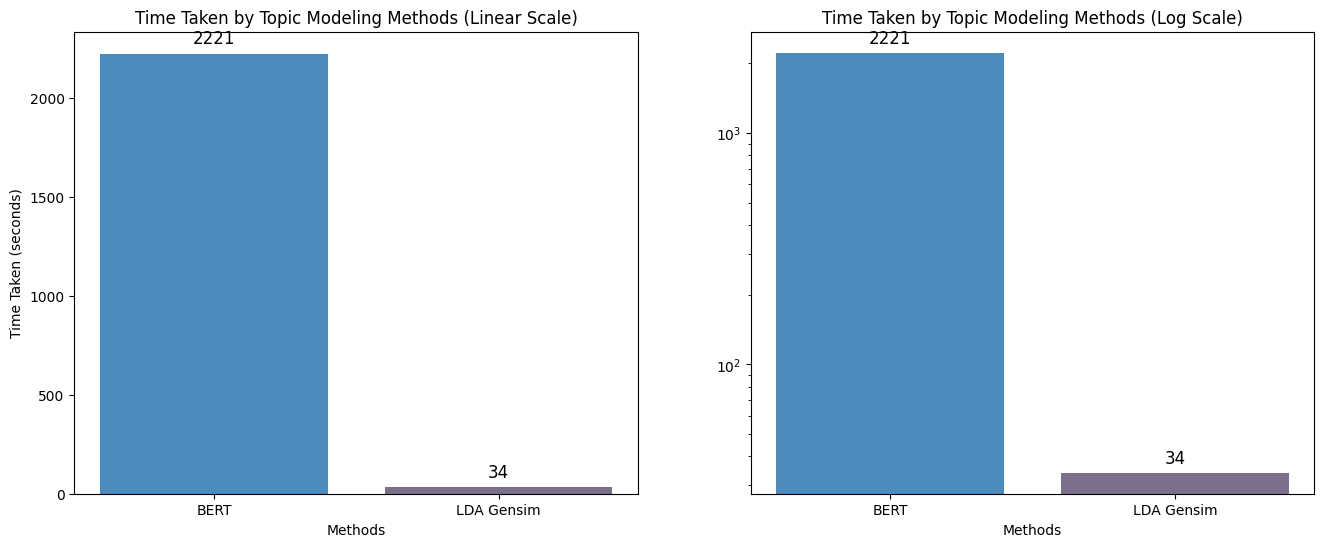

In [50]:
import matplotlib.pyplot as plt

# Set up the data
methods = ['BERT', 'LDA Gensim']
time_taken8 = [round(time_taken_bert8), round(time_taken_lda8)]
colors = ['#4B8BBE', '#7B6F8B']

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Linear scale bar chart
ax1.bar(methods, time_taken8, color=colors)
ax1.set_xlabel('Methods')
ax1.set_ylabel('Time Taken (seconds)')
ax1.set_title('Time Taken by Topic Modeling Methods (Linear Scale)')

for i, value in enumerate(time_taken8):
    ax1.text(i, value + 50, str(value), ha='center', fontsize=12)

# Log scale bar chart
ax2.bar(methods, time_taken8, color=colors, log=True)
ax2.set_yscale("log") # Set y-axis to log scale
ax2.set_xlabel('Methods')
ax2.set_title('Time Taken by Topic Modeling Methods (Log Scale)')

for i, value in enumerate(time_taken8):
    ax2.text(i, value * 1.1, str(value), ha='center', fontsize=12)

# Show the charts
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### USING A VERY HIGH NUMBER OF TOPICS i.e 15

### Bertopic

In [51]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Clustering model
kmeans_model = KMeans(n_clusters=15)
# Initiate a sentence transformer model
sentence_model = SentenceTransformer("paraphrase-albert-small-v2")
# Initiate a pretrained model
hf_model = pipeline("feature-extraction", model="distilroberta-base")

# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')
# Initiate another pretrained embedding model
glove_embedding = WordEmbeddings('crawl')
document_glove_embeddings = DocumentPoolEmbeddings([glove_embedding])
# Stack the two pretrained embedding models
stacked_embeddings = StackedEmbeddings(embeddings=[roberta_model, 
document_glove_embeddings])

# Count vectorizer
vectorizer_model = CountVectorizer(min_df=10)

# Initiate BERTopic
topic_model15 = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model, n_gram_range=(1, 3))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
import time
# Start the timer
start_time_bert15 = time.time()

# Run BERTopic model
topics, probabilities = topic_model15.fit_transform(data['Cleaned_Title + Abstract'])

# Stop the timer
end_time_bert15 = time.time()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [53]:
time_taken_bert15 = end_time_bert15 - start_time_bert15
# Print the time taken
print(f"Time taken to train the topic modeling model: {time_taken_bert15} seconds")

Time taken to train the topic modeling model: 1934.9800853729248 seconds


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Printing the Topics

In [54]:
num_topics = len(topic_model15.get_topic_info())  

for i in range(num_topics):
    print(f"Topic {i}:")
    terms = topic_model15.get_topic(i)
    for term, weight in terms:
        print(f"  {term}: {weight:.4f}")
    print()

Topic 0:
  charging: 0.0396
  ev: 0.0264
  vehicle: 0.0263
  electric: 0.0238
  electric vehicle: 0.0231
  station: 0.0156
  charging station: 0.0135
  proposed: 0.0114
  model: 0.0112
  distribution: 0.0107

Topic 1:
  energy: 0.0422
  renewable: 0.0347
  renewable energy: 0.0321
  policy: 0.0135
  development: 0.0115
  source: 0.0112
  country: 0.0101
  electricity: 0.0088
  energy source: 0.0087
  technology: 0.0080

Topic 2:
  energy: 0.0238
  system: 0.0200
  grid: 0.0178
  power: 0.0176
  smart: 0.0141
  renewable: 0.0129
  demand: 0.0109
  smart grid: 0.0103
  renewable energy: 0.0102
  generation: 0.0102

Topic 3:
  smart: 0.0247
  grid: 0.0211
  system: 0.0190
  smart grid: 0.0168
  data: 0.0161
  network: 0.0144
  communication: 0.0132
  power: 0.0124
  energy: 0.0115
  integration: 0.0113

Topic 4:
  charging: 0.0310
  vehicle: 0.0275
  electric: 0.0251
  electric vehicle: 0.0235
  ev: 0.0229
  power: 0.0188
  system: 0.0161
  grid: 0.0142
  battery: 0.0142
  station: 0.0114

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [55]:
# Get the list of topics
topic_model15.get_topic_info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count,Name
0,0,3889,0_charging_ev_vehicle_electric
1,1,3251,1_energy_renewable_renewable energy_policy
2,2,2655,2_energy_system_grid_power
3,3,2406,3_smart_grid_system_smart grid
4,4,2289,4_charging_vehicle_electric_electric vehicle
5,5,2236,5_charging_vehicle_electric_electric vehicle
6,6,2175,6_energy_system_renewable_storage
7,7,2164,7_power_system_voltage_control
8,8,1978,8_energy_renewable_renewable energy_system
9,9,1685,9_energy_renewable_renewable energy_consumption


In [56]:
# Visualize top topic keywords
topic_model15.visualize_barchart(top_n_topics=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## TRAINING LDA 15 CLUSTERS

In [57]:
num_topics = 15  #setting the number of clusters(topics)
start_time_lda15 = time.time() # record the start time

lda_model15 = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42)

end_time_lda15 = time.time() # record the end time

time_taken_lda15 = end_time_lda15 - start_time_lda15
# Print the time taken
print(f"Time taken to train the LDA model using gensim library: {time_taken_lda15} seconds")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Time taken to train the LDA model using gensim library: 29.636611223220825 seconds


In [58]:
from pprint import pprint
pprint(lda_model15.print_topics())
doc_lda = lda_model15[corpus]

[(0,
  '0.054*"charging" + 0.028*"station" + 0.018*"service" + 0.018*"electric" + '
  '0.017*"vehicle" + 0.012*"system" + 0.010*"proposed" + 0.010*"model" + '
  '0.009*"based" + 0.008*"distribution"'),
 (1,
  '0.028*"scheme" + 0.019*"teaching" + 0.014*"data" + 0.014*"using" + '
  '0.013*"center" + 0.011*"ufls" + 0.011*"cloud" + 0.010*"proposed" + '
  '0.009*"job" + 0.009*"selection"'),
 (2,
  '0.141*"energy" + 0.101*"renewable" + 0.019*"source" + 0.016*"electricity" + '
  '0.014*"system" + 0.010*"consumption" + 0.010*"resource" + '
  '0.008*"production" + 0.008*"wind" + 0.007*"demand"'),
 (3,
  '0.064*"model" + 0.052*"method" + 0.035*"estimation" + 0.035*"error" + '
  '0.033*"correlation" + 0.027*"data" + 0.026*"accuracy" + 0.024*"prediction" '
  '+ 0.020*"neural" + 0.017*"proposed"'),
 (4,
  '0.045*"caput" + 0.023*"ict" + 0.021*"energy" + 0.019*"data" + '
  '0.018*"foreign" + 0.017*"system" + 0.016*"power" + 0.013*"fault" + '
  '0.013*"nuclear" + 0.012*"fdi"'),
 (5,
  '0.013*"electric

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
# Visualizing the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/TOPIC MODELLING15'+str(num_topics))

def visualize_corpus(corpus):
    return pyLDAvis.gensim_models.prepare(lda_model15, corpus, id2word)

if 1 == 1:
    with Pool(processes=1) as pool:
        result = list(tqdm.tqdm(pool.imap(visualize_corpus, [corpus]), total=1))
        LDAvis_prepared = result[0]

    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'content_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

100%|██████████| 1/1 [00:30<00:00, 30.03s/it]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.177809 -0.033441       1        1  13.242992
8     -0.093151 -0.113588       2        1  11.170946
6     -0.031406  0.072227       3        1  10.604912
13    -0.248862  0.101254       4        1   9.745649
9     -0.009383 -0.041348       5        1   9.493181
0      0.021774 -0.029377       6        1   7.761908
14    -0.104015  0.141140       7        1   7.656619
7      0.045980 -0.058456       8        1   7.188966
5     -0.039804  0.013736       9        1   6.019820
10     0.124387 -0.159988      10        1   5.358762
11     0.099467 -0.077665      11        1   3.262403
12     0.016810 -0.095486      12        1   2.497182
3      0.272943  0.188331      13        1   2.332557
1      0.090306  0.067739      14        1   1.936785
4      0.032762  0.024924      15        1   1.727318, topic_info=            Term           Freq          Total Category  logprob  loglift
103    renewable   64781.000000   64781.000000  Default  30.0000  30.0000
445     charging   36337.000000   36337.000000  Default  29.0000  29.0000
18        energy  107758.000000  107758.000000  Default  28.0000  28.0000
19            ev   17875.000000   17875.000000  Default  27.0000  27.0000
302        model   26374.000000   26374.000000  Default  26.0000  26.0000
..           ...            ...            ...      ...      ...      ...
103    renewable     368.972483   64781.926726  Topic15  -5.1361  -1.1095
34         paper     308.431706   22248.025426  Topic15  -5.3153  -0.2199
21          grid     268.876764   16068.900042  Topic15  -5.4526  -0.0318
497  distributed     224.119591    3678.392173  Topic15  -5.6347   1.2605
4          based     261.219927   17747.051219  Topic15  -5.4815  -0.1600

[1158 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
7546      9  0.974095   abandoned
8303      6  0.988569      abroad
1039     15  0.985609   abundance
121       1  0.001074          ac
121       2  0.149305          ac
...     ...       ...         ...
9826      6  0.988367        yuan
5768      3  0.979598  zeroenergy
5768      5  0.007256  zeroenergy
9512      8  0.015003         zvs
9512     10  0.960167         zvs

[5685 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 7, 14, 10, 1, 15, 8, 6, 11, 12, 13, 4, 2, 5])

### TIME TAKEN FOR 15 CLUSTERS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



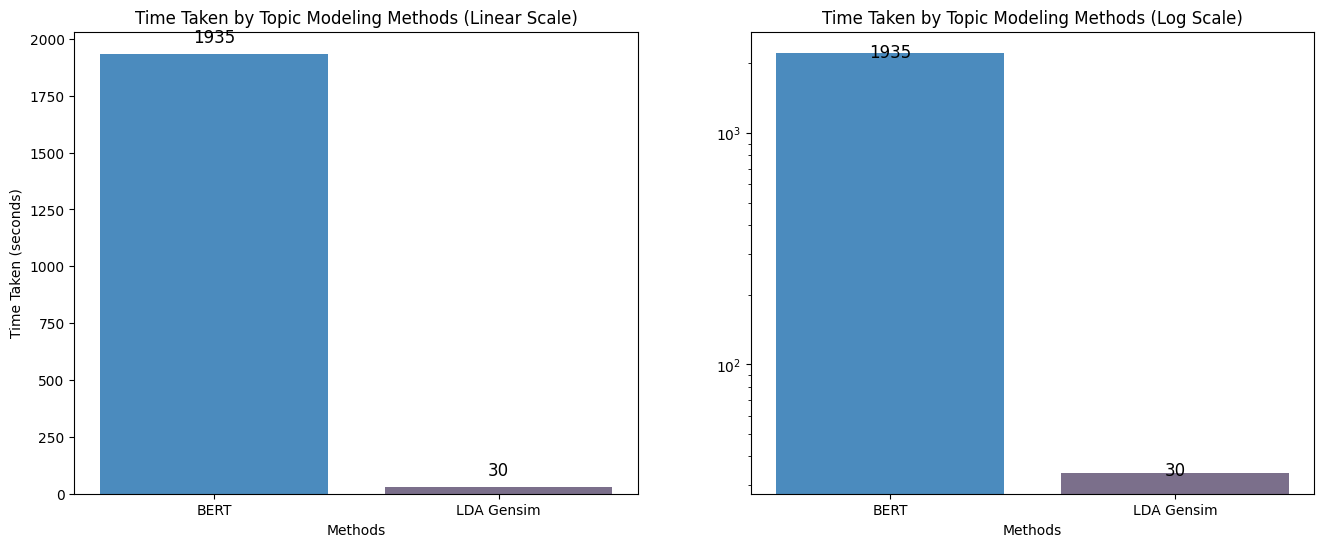

In [61]:
import matplotlib.pyplot as plt

# Set up the data
methods = ['BERT', 'LDA Gensim']
time_taken15 = [round(time_taken_bert15), round(time_taken_lda15)]
colors = ['#4B8BBE', '#7B6F8B']

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Linear scale bar chart
ax1.bar(methods, time_taken15, color=colors)
ax1.set_xlabel('Methods')
ax1.set_ylabel('Time Taken (seconds)')
ax1.set_title('Time Taken by Topic Modeling Methods (Linear Scale)')

for i, value in enumerate(time_taken15):
    ax1.text(i, value + 50, str(value), ha='center', fontsize=12)

# Log scale bar chart
ax2.bar(methods, time_taken8, color=colors, log=True)
ax2.set_yscale("log") # Set y-axis to log scale
ax2.set_xlabel('Methods')
ax2.set_title('Time Taken by Topic Modeling Methods (Log Scale)')

for i, value in enumerate(time_taken15):
    ax2.text(i, value * 1.1, str(value), ha='center', fontsize=12)

# Show the charts
plt.show()


### COMPARING THE TIME TAKEN FOR BOTH MODELS WITH 8 AND 15 CLUSTERS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



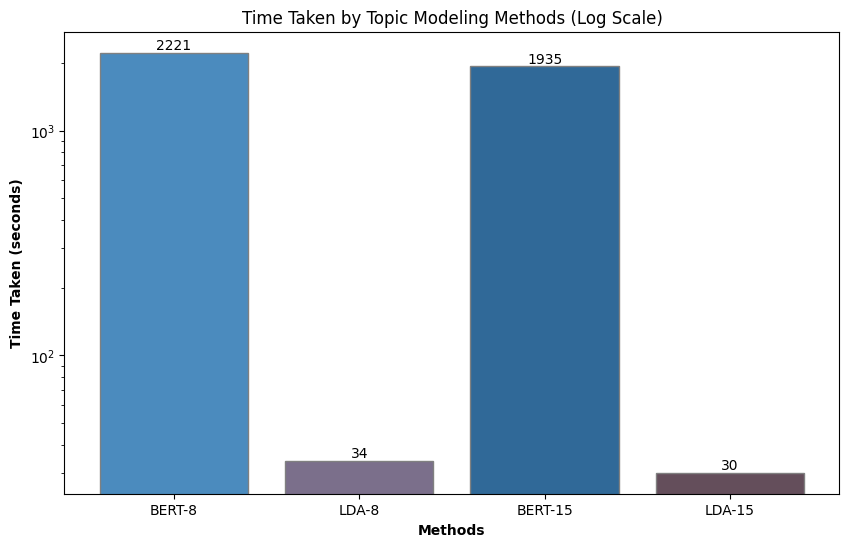

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the data
methods = ['BERT-8', 'LDA-8', 'BERT-15', 'LDA-15']
time_taken = [round(time_taken_bert8), round(time_taken_lda8), round(time_taken_bert15), round(time_taken_lda15)]
colors = ['#4B8BBE', '#7B6F8B', '#306998', '#644E5B']

# Create the bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(methods, time_taken, color=colors, edgecolor='grey')

# Add the data value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Methods', fontweight='bold')
plt.ylabel('Time Taken (seconds)', fontweight='bold')

# Set y-axis to log scale
plt.yscale('log')

plt.title('Time Taken by Topic Modeling Methods (Log Scale)')
plt.show()
